In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import nltk
import mplcyberpunk
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
plt.style.use("dark_background")
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Dell/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Dell/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load & Combine Dataset

In [ ]:
fake = pd.read_csv('Fake.csv')
real = pd.read_csv('True.csv')

fake['label'] = 0
real['label'] = 1

news = pd.concat([fake , real] , ignore_index=True).sample(frac=1 , random_state=42).reset_index(drop=True)
news

,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1
...,...,...,...,...,...
44893,UNREAL! CBS’S TED KOPPEL Tells Sean Hannity He...,,politics,"Mar 27, 2017",0
44894,PM May seeks to ease Japan's Brexit fears duri...,LONDON/TOKYO (Reuters) - British Prime Ministe...,worldnews,"August 29, 2017",1
44895,Merkel: Difficult German coalition talks can r...,BERLIN (Reuters) - Chancellor Angela Merkel sa...,worldnews,"November 16, 2017",1
44896,Trump Stole An Idea From North Korean Propaga...,Jesus f*cking Christ our President* is a moron...,News,"July 14, 2017",0


## Drop none used columns

In [ ]:
news = news.drop(columns=['subject' , 'date'])
news

,title,text,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",1
...,...,...,...
44893,UNREAL! CBS’S TED KOPPEL Tells Sean Hannity He...,,0
44894,PM May seeks to ease Japan's Brexit fears duri...,LONDON/TOKYO (Reuters) - British Prime Ministe...,1
44895,Merkel: Difficult German coalition talks can r...,BERLIN (Reuters) - Chancellor Angela Merkel sa...,1
44896,Trump Stole An Idea From North Korean Propaga...,Jesus f*cking Christ our President* is a moron...,0


## Preprocessing

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def preprocess(text):
    text = text.lower()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    tokens = [word for word in tokens if word not in string.punctuation]
    return " ".join(tokens)

In [ ]:
news['clean_text'] = (news['title'] + " " + news['text']).apply(preprocess)
news.head()

,title,text,label,clean_text
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",0,ben stein call 9th circuit court: committed ‘c...
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,1,trump drop steve bannon national security coun...
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,1,puerto rico expects u.s. lift jones act shippi...
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",0,oops: trump accidentally confirmed leaked isra...
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",1,donald trump head scotland reopen golf resort ...


## Vectorization useing TF-IDF Vectorizer

In [ ]:
vectorization = TfidfVectorizer(max_features=5000)
x = vectorization.fit_transform(news['clean_text'])
y = news['label']

## Model Training

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x , y , random_state=42 , test_size=0.2)

model = LogisticRegression(max_iter=1000)
model.fit(x_train , y_train)

LogisticRegression(max_iter=1000)

## Evaluate Accuracy and F1-Score

In [ ]:
y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Accuracy: 0.9884187082405346
F1-Score: 0.9878646441073512


## Word Clouds

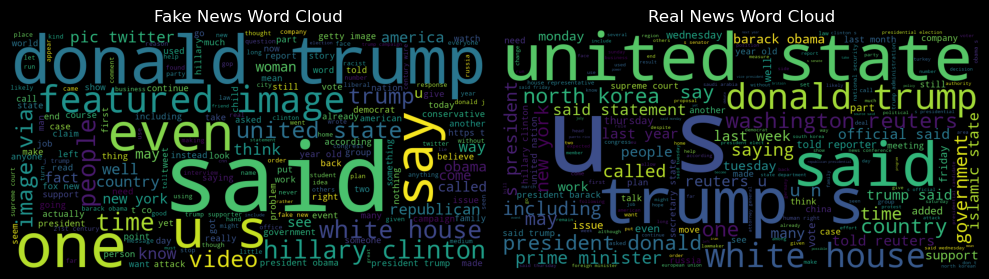

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fake news cloud
fake_words = " ".join(news[news['label'] == 0]['clean_text'])
real_words = " ".join(news[news['label'] == 1]['clean_text'])

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=1000, height=500).generate(fake_words))
plt.title("Fake News Word Cloud")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=1000, height=500).generate(real_words))
plt.title("Real News Word Cloud")
plt.axis('off')
plt.tight_layout()
plt.show()